In [2]:
from __init__ import *
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

import snmcseq_utils
import CEMBA_run_tsne
import CEMBA_clustering_louvain_jaccard
import CEMBA_autoannotate

/cndd/fangming/venvs/venv_banjo_snmcseq/lib/python3.4/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
log = snmcseq_utils.create_logger()
log.info('1')

03/30/2018 01:33:57 AM 1


In [4]:
ens = 'Ens10'
context = 'CH'

In [5]:
f = os.path.join(PATH_ENSEMBLES, ens, 'binc', 'binc_m{}_100000_nmcc_{}.tsv'.format(context, ens))
df = pd.read_table(f, dtype={'chr': object})
print(df.shape)
df.head()

(20368, 5354)


,chr,bin,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_4_CEMBA171206_3C_5_A11_AD002_indexed_mcc,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_G4_AD008_indexed_mcc,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_C3_AD002_indexed_mcc,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_H3_AD002_indexed_mcc,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_4_CEMBA171206_3C_5_B7_AD002_indexed_mcc,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_4_CEMBA171206_3C_5_E8_AD001_indexed_mcc,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_A3_AD001_indexed_mcc,171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171206_3C_1_CEMBA171206_3C_3_C9_AD012_indexed_mcc,...,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_F8_AD002_indexed_mcc,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_G2_AD002_indexed_mcc,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_G4_AD002_indexed_mcc,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_G6_AD002_indexed_mcc,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_G8_AD002_indexed_mcc,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H10_AD002_indexed_mcc,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H12_AD002_indexed_mcc,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H2_AD002_indexed_mcc,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H4_AD002_indexed_mcc,180118_CEMBA_mm_P56_P63_4B_CEMBA180104_4B_3_CEMBA180104_4B_4_H6_AD002_indexed_mcc
0,1,3000000,0.415143,0.394011,0.471327,0.354438,0.543024,0.442102,0.364283,0.538429,...,0.315635,0.187462,0.111175,0.341490,0.519275,0.415004,0.263807,0.642466,0.386668,0.396157
1,1,3100000,0.523636,0.578402,0.597015,0.455652,0.620144,0.812534,0.339909,0.585689,...,0.199496,0.672067,0.575512,0.671785,0.735547,0.406654,0.257033,0.488154,0.432709,0.666747
2,1,3200000,0.425563,0.378346,0.476878,0.404236,0.717268,0.554798,0.349748,0.250829,...,0.577759,0.330019,0.518347,0.513267,0.265765,0.331013,0.401590,0.318117,0.242055,0.167240
3,1,3400000,0.444628,0.473626,0.784348,0.210236,0.778952,0.397854,0.306806,0.278522,...,0.247185,0.277627,0.341873,0.626687,0.306917,0.493559,0.212101,0.479363,0.306386,0.346576
4,1,3600000,0.391592,0.449630,0.581135,0.342466,0.457775,0.236468,0.416087,0.395551,...,0.334757,0.274223,0.514945,0.158383,0.244795,0.295053,0.186957,0.254131,0.297121,0.346791


In [ ]:
# CEMBA_defaults
# # tSNE use from nmcc files
# CEMBA_run_tsne.run_tsne_CEMBA(ens, perps=PERPLEXITIES, n_pc=N_PC, n_dim=N_DIM)
# # louvain clustering
# CEMBA_clustering_louvain_jaccard.run_louvain_CEMBA(ens, ks=K_NN, n_pc=N_PC)
# # annotation
# CEMBA_autoannotate.run_autoannotate_CEMBA(ens)

In [74]:
# # generate clustering
# for k in K_NN + [200, 500, 1000]:
#     clst, summary = CEMBA_clustering_louvain_jaccard.louvain_jaccard(df_even, n_pc=50, k=k, sub_ncells=None, 
#                                     output_file='/cndd/fangming/integration/clustering_explore/even_chr_k{}.tsv'.format(k), 
#                                     sample_column_suffix='_mcc')

#     clst, summary = CEMBA_clustering_louvain_jaccard.louvain_jaccard(df_odd, n_pc=50, k=k, sub_ncells=None, 
#                                     output_file='/cndd/fangming/integration/clustering_explore/odd_chr_k{}.tsv'.format(k), 
#                                     sample_column_suffix='_mcc')
    
#     clst, summary = CEMBA_clustering_louvain_jaccard.louvain_jaccard(df_all, n_pc=50, k=k, sub_ncells=None, 
#                                     output_file='/cndd/fangming/integration/clustering_explore/all_chr_k{}.tsv'.format(k), 
#                                     sample_column_suffix='_mcc')

In [15]:
# old
df_even = df[df['chr'].isin(even_chrs)].set_index(['chr', 'bin'])
df_odd = df[df['chr'].isin(odd_chrs)].set_index(['chr', 'bin'])
df_all = df[df['chr'].isin(all_chrs)].set_index(['chr', 'bin'])
print(df_even.shape)
print(df_odd.shape)
print(df_all.shape)

(9943, 5352)
(9741, 5352)
(19684, 5352)


In [44]:
# compare clustering
ari_list = []
nclst_list = []
for k in K_NN + [200, 500, 1000]:
    f_even = '/cndd/fangming/integration/clustering_explore/even_chr_k{}.tsv'.format(k)
    f_odd = '/cndd/fangming/integration/clustering_explore/odd_chr_k{}.tsv'.format(k)
    f_all = '/cndd/fangming/integration/clustering_explore/all_chr_k{}.tsv'.format(k)
   
    clst_even = pd.read_table(f_even, index_col='sample')
    clst_odd = pd.read_table(f_odd, index_col='sample')
    clst_all = pd.read_table(f_all, index_col='sample')
    
    nclsts = [len(clst_even['cluster_ID'].unique()), 
              len(clst_odd['cluster_ID'].unique()), 
              len(clst_all['cluster_ID'].unique()), 
            ]
    aris = [adjusted_rand_score(clst_even['cluster_ID'].values, clst_odd['cluster_ID'].values),  
            adjusted_rand_score(clst_all['cluster_ID'].values, clst_even['cluster_ID'].values),  
            adjusted_rand_score(clst_all['cluster_ID'].values, clst_odd['cluster_ID'].values),  
           ]
    
    
    nclst_list.append(nclsts)
    ari_list.append(aris)
    
nclst_list = np.asarray(nclst_list)
ari_list = np.asarray(ari_list)

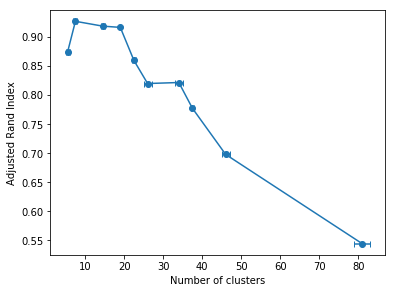

In [73]:
# old
fig, ax = plt.subplots(figsize=(6, 4.5))
# ax.plot(, ari_list[:,0], '-o', label='Even chroms vs Odd chromos')
# ax.plot(np.mean(nclst_list, axis=1), ari_list[:,1], '-o', label='all vs even')
# ax.plot(np.mean(nclst_list, axis=1), ari_list[:,2], '-o', label='all vs odd')
ax.errorbar(np.mean(nclst_list[:,:2], axis=1), ari_list[:,0], xerr=np.std(nclst_list[:,:2], axis=1), 
            fmt='-o', capsize=3)
# for cap in caps:
#     cap.set_color('red')
#     cap.set_markeredgewidth(50)
# ax.legend()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Adjusted Rand Index')
# ax.set_title('Comparison of clustering results between using even chromosomes and odd chromosomes')
plt.show()

In [6]:
all_chrs = snmcseq_utils.get_mouse_chromosomes() 
# ks = [5, 10, 15, 20, 30, 50, 100, 200, 500, 1000]
ks = [2, 3, 4] 
res_list = []

for i in range(20):
    print('Round {}...'.format(i+1))
    # split the genome in half
    even_chrs = np.random.choice(all_chrs, int(len(all_chrs)/2), replace=False)
    odd_chrs = [chrom for chrom in all_chrs if chrom not in even_chrs]
    df_even = df[df['chr'].isin(even_chrs)].set_index(['chr', 'bin']) 
    df_odd = df[df['chr'].isin(odd_chrs)].set_index(['chr', 'bin']) 

    # generate clustering, record k, nclst_even, nclst_odd, ari
    for k in ks:
        clst_even, summary = CEMBA_clustering_louvain_jaccard.louvain_jaccard(df_even, n_pc=50, k=k, sub_ncells=None, 
                                        output_file='/cndd/fangming/integration/clustering_explore/even_chr_k{}.tsv'.format(k), 
                                        sample_column_suffix='_mcc')
        clst_odd, summary = CEMBA_clustering_louvain_jaccard.louvain_jaccard(df_odd, n_pc=50, k=k, sub_ncells=None, 
                                        output_file='/cndd/fangming/integration/clustering_explore/odd_chr_k{}.tsv'.format(k), 
                                        sample_column_suffix='_mcc')

        nclst_even = len(clst_even['cluster_ID'].unique())
        nclst_odd = len(clst_odd['cluster_ID'].unique())
        ari = adjusted_rand_score(clst_even['cluster_ID'].values, clst_odd['cluster_ID'].values)
        res = {'k': k, 'nclst_even': nclst_even, 'nclst_odd': nclst_odd, 'ari': ari}
        res_list.append(res)
    

Round 1...


03/30/2018 01:34:52 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9517)
03/30/2018 01:35:11 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 19.210594415664673), ('n_pc', 50), ('nclst', 1122), ('time_clst', 2.4265482425689697), ('k', 2)])
03/30/2018 01:35:11 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:35:11 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10851)
03/30/2018 01:35:28 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.842368841171265), ('n_pc', 50), ('nclst', 1094), ('time_clst', 2.391659736633301), ('k', 2)])
03/30/2018 01:35:28 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:35:28 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9517)
03/30/2018 01:35:44 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.28205895

Round 2...


03/30/2018 01:36:38 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9262)
03/30/2018 01:36:53 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.410947799682617), ('n_pc', 50), ('nclst', 1102), ('time_clst', 2.548658609390259), ('k', 2)])
03/30/2018 01:36:53 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:36:53 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 11106)
03/30/2018 01:37:11 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.496629238128662), ('n_pc', 50), ('nclst', 1088), ('time_clst', 2.256312131881714), ('k', 2)])
03/30/2018 01:37:11 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:37:11 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9262)
03/30/2018 01:37:26 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.170999050

Round 3...


03/30/2018 01:38:19 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9754)
03/30/2018 01:38:37 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 18.43736243247986), ('n_pc', 50), ('nclst', 1109), ('time_clst', 2.3373658657073975), ('k', 2)])
03/30/2018 01:38:37 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:38:37 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10614)
03/30/2018 01:38:58 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 20.50119423866272), ('n_pc', 50), ('nclst', 1088), ('time_clst', 2.528069019317627), ('k', 2)])
03/30/2018 01:38:58 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:38:58 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9754)
03/30/2018 01:39:14 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.9054391384

Round 4...


03/30/2018 01:40:05 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10462)
03/30/2018 01:40:19 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 14.716665506362915), ('n_pc', 50), ('nclst', 1121), ('time_clst', 2.1059534549713135), ('k', 2)])
03/30/2018 01:40:19 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:40:19 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9906)
03/30/2018 01:40:36 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.89005470275879), ('n_pc', 50), ('nclst', 1084), ('time_clst', 2.315648317337036), ('k', 2)])
03/30/2018 01:40:36 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:40:36 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10462)
03/30/2018 01:40:54 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.70619058

Round 5...


03/30/2018 01:41:50 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10604)
03/30/2018 01:42:07 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.653239250183105), ('n_pc', 50), ('nclst', 1110), ('time_clst', 2.522927761077881), ('k', 2)])
03/30/2018 01:42:07 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:42:07 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9764)
03/30/2018 01:42:24 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.87947940826416), ('n_pc', 50), ('nclst', 1092), ('time_clst', 2.117142677307129), ('k', 2)])
03/30/2018 01:42:24 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:42:24 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10604)
03/30/2018 01:42:39 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.159814596

Round 6...


03/30/2018 01:43:32 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10190)
03/30/2018 01:43:46 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 13.835080623626709), ('n_pc', 50), ('nclst', 1101), ('time_clst', 2.3303959369659424), ('k', 2)])
03/30/2018 01:43:46 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:43:46 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10178)
03/30/2018 01:44:04 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.992629766464233), ('n_pc', 50), ('nclst', 1092), ('time_clst', 2.1985137462615967), ('k', 2)])
03/30/2018 01:44:04 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:44:04 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10190)
03/30/2018 01:44:20 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.09993

Round 7...


03/30/2018 01:45:15 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9528)
03/30/2018 01:45:30 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.301236629486084), ('n_pc', 50), ('nclst', 1075), ('time_clst', 2.4991228580474854), ('k', 2)])
03/30/2018 01:45:30 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:45:30 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10840)
03/30/2018 01:45:48 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.808629512786865), ('n_pc', 50), ('nclst', 1107), ('time_clst', 2.233928918838501), ('k', 2)])
03/30/2018 01:45:48 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:45:48 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9528)
03/30/2018 01:46:03 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.18468022

Round 8...


03/30/2018 01:46:54 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9810)
03/30/2018 01:47:08 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 13.800183534622192), ('n_pc', 50), ('nclst', 1082), ('time_clst', 2.403587818145752), ('k', 2)])
03/30/2018 01:47:08 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:47:09 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10558)
03/30/2018 01:47:23 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 14.647647857666016), ('n_pc', 50), ('nclst', 1079), ('time_clst', 2.086705446243286), ('k', 2)])
03/30/2018 01:47:23 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:47:23 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9810)
03/30/2018 01:47:39 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.617526531

Round 9...


03/30/2018 01:48:31 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9855)
03/30/2018 01:48:48 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.503815412521362), ('n_pc', 50), ('nclst', 1094), ('time_clst', 2.1118924617767334), ('k', 2)])
03/30/2018 01:48:48 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:48:48 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10513)
03/30/2018 01:49:03 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.227069616317749), ('n_pc', 50), ('nclst', 1106), ('time_clst', 2.171962261199951), ('k', 2)])
03/30/2018 01:49:03 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:49:03 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9855)
03/30/2018 01:49:21 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.85393428

Round 10...


03/30/2018 01:50:13 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9556)
03/30/2018 01:50:27 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 14.316527605056763), ('n_pc', 50), ('nclst', 1086), ('time_clst', 2.137387752532959), ('k', 2)])
03/30/2018 01:50:27 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:50:28 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10812)
03/30/2018 01:50:44 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.308851718902588), ('n_pc', 50), ('nclst', 1095), ('time_clst', 2.281122922897339), ('k', 2)])
03/30/2018 01:50:44 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:50:44 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9556)
03/30/2018 01:51:00 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.351735115

Round 11...


03/30/2018 01:51:55 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10032)
03/30/2018 01:52:10 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.096796751022339), ('n_pc', 50), ('nclst', 1088), ('time_clst', 2.7440786361694336), ('k', 2)])
03/30/2018 01:52:10 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:52:10 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10336)
03/30/2018 01:52:27 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.301236629486084), ('n_pc', 50), ('nclst', 1095), ('time_clst', 2.23181414604187), ('k', 2)])
03/30/2018 01:52:27 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:52:27 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10032)
03/30/2018 01:52:43 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.0131628

Round 12...


03/30/2018 01:53:36 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9161)
03/30/2018 01:53:51 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.712141990661621), ('n_pc', 50), ('nclst', 1080), ('time_clst', 2.2749557495117188), ('k', 2)])
03/30/2018 01:53:51 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:53:51 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 11207)
03/30/2018 01:54:09 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.71026611328125), ('n_pc', 50), ('nclst', 1082), ('time_clst', 2.1920666694641113), ('k', 2)])
03/30/2018 01:54:09 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:54:09 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9161)
03/30/2018 01:54:26 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.04378199

Round 13...


03/30/2018 01:55:24 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9661)
03/30/2018 01:55:40 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.127653121948242), ('n_pc', 50), ('nclst', 1093), ('time_clst', 2.494492769241333), ('k', 2)])
03/30/2018 01:55:40 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:55:40 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10707)
03/30/2018 01:55:55 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 15.610300064086914), ('n_pc', 50), ('nclst', 1108), ('time_clst', 2.2896833419799805), ('k', 2)])
03/30/2018 01:55:55 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:55:55 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9661)
03/30/2018 01:56:12 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.46864891

Round 14...


03/30/2018 01:57:10 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10560)
03/30/2018 01:57:30 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 20.018136262893677), ('n_pc', 50), ('nclst', 1071), ('time_clst', 2.2512757778167725), ('k', 2)])
03/30/2018 01:57:30 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:57:30 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9808)
03/30/2018 01:57:48 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 18.163748502731323), ('n_pc', 50), ('nclst', 1099), ('time_clst', 2.0610268115997314), ('k', 2)])
03/30/2018 01:57:48 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:57:48 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10560)
03/30/2018 01:58:04 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.065161

Round 15...


03/30/2018 01:58:56 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 11129)
03/30/2018 01:59:13 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.843122243881226), ('n_pc', 50), ('nclst', 1117), ('time_clst', 2.2295117378234863), ('k', 2)])
03/30/2018 01:59:13 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 01:59:13 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9239)
03/30/2018 01:59:29 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.224101066589355), ('n_pc', 50), ('nclst', 1084), ('time_clst', 2.2849063873291016), ('k', 2)])
03/30/2018 01:59:29 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 01:59:29 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 11129)
03/30/2018 01:59:46 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.486329

Round 16...


03/30/2018 02:00:35 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10273)
03/30/2018 02:00:49 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 14.424225568771362), ('n_pc', 50), ('nclst', 1100), ('time_clst', 2.1460323333740234), ('k', 2)])
03/30/2018 02:00:49 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 02:00:49 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10095)
03/30/2018 02:01:07 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.259149312973022), ('n_pc', 50), ('nclst', 1093), ('time_clst', 2.032849073410034), ('k', 2)])
03/30/2018 02:01:07 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 02:01:07 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10273)
03/30/2018 02:01:23 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.125782

Round 17...


03/30/2018 02:02:16 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9081)
03/30/2018 02:02:31 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 14.227496147155762), ('n_pc', 50), ('nclst', 1084), ('time_clst', 2.07720685005188), ('k', 2)])
03/30/2018 02:02:31 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 02:02:31 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 11287)
03/30/2018 02:02:49 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.89352822303772), ('n_pc', 50), ('nclst', 1116), ('time_clst', 2.3694403171539307), ('k', 2)])
03/30/2018 02:02:49 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 02:02:50 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9081)
03/30/2018 02:03:07 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.2430796623

Round 18...


03/30/2018 02:04:00 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9199)
03/30/2018 02:04:19 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 19.22862410545349), ('n_pc', 50), ('nclst', 1106), ('time_clst', 2.5876576900482178), ('k', 2)])
03/30/2018 02:04:19 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 02:04:19 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 11169)
03/30/2018 02:04:36 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.902597665786743), ('n_pc', 50), ('nclst', 1118), ('time_clst', 2.5859858989715576), ('k', 2)])
03/30/2018 02:04:36 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 02:04:36 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 9199)
03/30/2018 02:04:54 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 18.05187606

Round 19...


03/30/2018 02:05:47 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10030)
03/30/2018 02:06:05 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.778190851211548), ('n_pc', 50), ('nclst', 1105), ('time_clst', 2.235966920852661), ('k', 2)])
03/30/2018 02:06:05 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 02:06:05 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10338)
03/30/2018 02:06:22 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 17.05132818222046), ('n_pc', 50), ('nclst', 1103), ('time_clst', 2.2183351516723633), ('k', 2)])
03/30/2018 02:06:22 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 02:06:22 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10030)
03/30/2018 02:06:42 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 19.8890140

Round 20...


03/30/2018 02:07:35 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10019)
03/30/2018 02:07:51 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.04655170440674), ('n_pc', 50), ('nclst', 1101), ('time_clst', 2.2743818759918213), ('k', 2)])
03/30/2018 02:07:51 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/even_chr_k2.tsv
03/30/2018 02:07:51 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10349)
03/30/2018 02:08:07 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.486483335494995), ('n_pc', 50), ('nclst', 1125), ('time_clst', 2.185518741607666), ('k', 2)])
03/30/2018 02:08:07 AM Outputing clustering results to: /cndd/fangming/integration/clustering_explore/odd_chr_k2.tsv
03/30/2018 02:08:07 AM Begin louvain jaccard clustering
Input shape (n_obs, n_features): (5352, 10019)
03/30/2018 02:08:23 AM clustering summary: OrderedDict([('n_cells', 5352), ('time', 16.2051310

In [24]:
# generate df_res
df_res = pd.DataFrame(res_list)
df_res.to_csv('/cndd/fangming/integration/clustering_half_genome.tsv',
             sep='\t', header=True, index=False)

In [25]:
# read df_res from file
df_res = pd.read_table('/cndd/fangming/integration/results/clustering_half_genome_v0.tsv')
df_res.head()

,ari,k,nclst_even,nclst_odd
0,0.546398,5,81,87
1,0.696102,10,45,46
2,0.749717,15,36,39
3,0.773050,20,33,32
4,0.808136,30,24,27


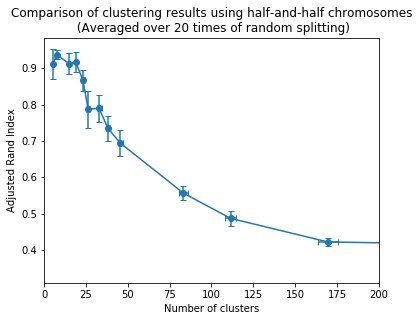

In [28]:
plot_res = []
for k, df_sub in df_res.groupby('k'):
    nclsts = df_sub['nclst_even'].tolist() + df_sub['nclst_odd'].tolist()
    nclst_mean = np.mean(nclsts)
    nclst_std = np.std(nclsts)
    ari_mean = df_sub['ari'].mean()
    ari_std = df_sub['ari'].std()
    plot_res.append({'k': k, 
                    'nclst_mean': nclst_mean, 
                    'nclst_std': nclst_std,
                    'ari_mean': ari_mean, 
                    'ari_std': ari_std,})
    
plot_res = pd.DataFrame(plot_res) 
    
    
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.errorbar(plot_res['nclst_mean'], plot_res['ari_mean'], 
            xerr=plot_res['nclst_std'], 
            yerr=plot_res['ari_std'], 
            fmt='-o', capsize=3)
ax.set_xlim([0, 200])
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Adjusted Rand Index')
ax.set_title('Comparison of clustering results using half-and-half chromosomes' 
             + '\n (Averaged over 20 times of random splitting)')
fig.savefig('/cndd/fangming/integration/clustering_half_genome.pdf')
plt.show()

In [30]:
f = os.path.join(PATH_ENSEMBLES, ens, 'tsne', 'tsne_ndim2_perp30_npc50_binc_mCHmCG_100000_nmcc_Ens10.tsv')
df_tsne = pd.read_table(f, index_col='sample')

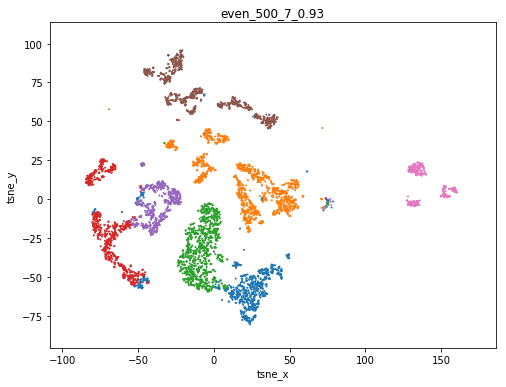

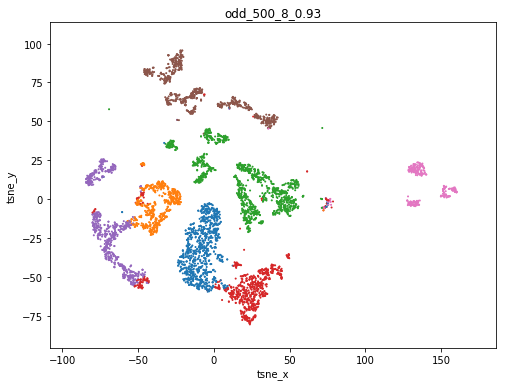

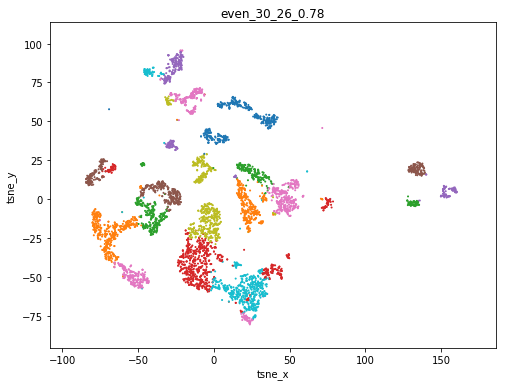

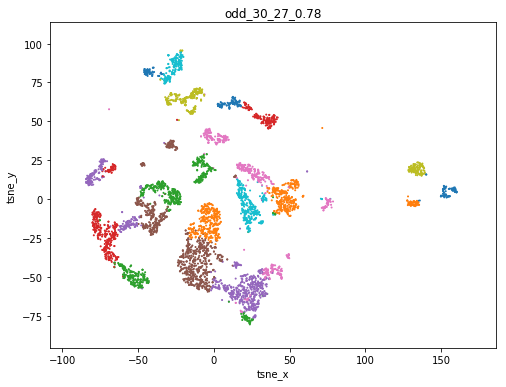

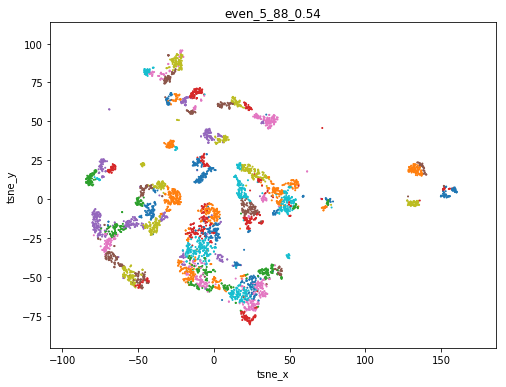

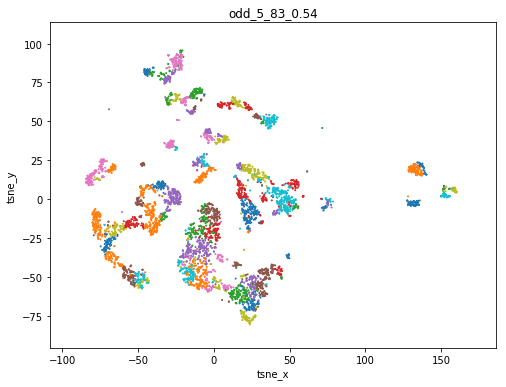

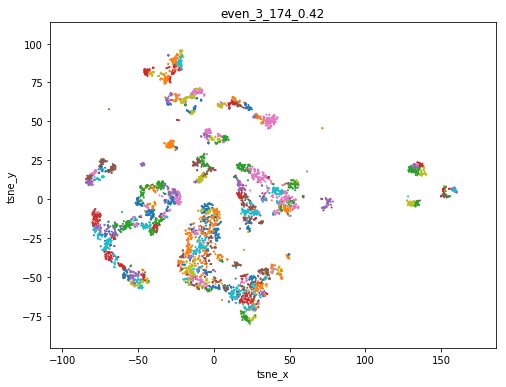

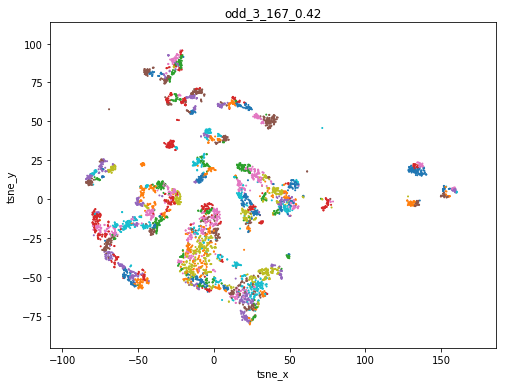

array([[  7,   8],
       [ 26,  27],
       [ 88,  83],
       [174, 167]])

In [31]:
# 3 typical examples and ARI
ks = [500, 30, 5, 3]
ari_list = []
nclst_list = []
for k in ks:
    f_even = '/cndd/fangming/integration/clustering_explore/even_chr_k{}.tsv'.format(k)
    f_odd = '/cndd/fangming/integration/clustering_explore/odd_chr_k{}.tsv'.format(k)
#     f_all = '/cndd/fangming/integration/clustering_explore/all_chr_k{}.tsv'.format(k)
   
    clst_even = pd.read_table(f_even, index_col='sample')
    clst_odd = pd.read_table(f_odd, index_col='sample')
    
    nclsts = (len(clst_even['cluster_ID'].unique()), 
              len(clst_odd['cluster_ID'].unique()), 
             )
    aris = adjusted_rand_score(clst_even['cluster_ID'].values, clst_odd['cluster_ID'].values)  
    
    nclst_list.append(nclsts)
    ari_list.append(aris)
   
    df_plot = pd.merge(df_tsne, clst_even, left_index=True, right_index=True)
    snmcseq_utils.plot_tsne_labels(df_plot, tc='cluster_ID', legend_mode=-1, title='even_{}_{}_{:.2f}'.format(k, nclsts[0], aris))
    df_plot = pd.merge(df_tsne, clst_even, left_index=True, right_index=True)
    snmcseq_utils.plot_tsne_labels(df_plot, tc='cluster_ID', legend_mode=-1, title='odd_{}_{}_{:.2f}'.format(k, nclsts[1], aris))
    
nclst_list = np.asarray(nclst_list)
ari_list = np.asarray(ari_list)

ari_list
nclst_list